In [1]:
import hashlib
import hmac
import math
import csv
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = '/content/drive/MyDrive/Aviator/Data1/data(1).csv'
data = pd.read_csv(path)
print(data)

        Unnamed: 0   Odd  Odd_Categoria  odd_entrada  \
0                0  1.15              3         11.0   
1                1  1.19              3          3.0   
2                2  5.92             10          3.0   
3                3  1.11              2         10.0   
4                4  1.06              2          2.0   
...            ...   ...            ...          ...   
999984      999984  1.71              6         10.0   
999985      999985  5.16             10          6.0   
999986      999986  1.23              3         10.0   
999987      999987  9.00             10          3.0   
999988      999988  2.26              7         10.0   

        odd_categoria_media_movel5  odd_categoria_media_movel10  \
0                              6.4                          6.5   
1                              5.8                          6.1   
2                              5.0                          5.7   
3                              6.4                         

In [3]:
data.columns

Index(['Unnamed: 0', 'Odd', 'Odd_Categoria', 'odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior'],
      dtype='object')

In [13]:
data = data1

In [14]:
data = data1[['Odd']]
data

,Odd
0,1.15
1,1.19
2,5.92
3,1.11
4,1.06
...,...
999984,1.71
999985,5.16
999986,1.23
999987,9.00


In [15]:
t = len(data)
for i in range(0,t):
  if data['Odd'][i] == 0:
    data['Odd'].iloc[i] = 1


In [16]:
data['Odd'].describe()

count    999989.000000
mean         13.521328
std         936.121428
min           1.000000
25%           1.310000
50%           1.970000
75%           3.930000
max      571831.230000
Name: Odd, dtype: float64

In [ ]:
geral_cat = []
for name in data['Odd']:
  if name < 1.97:
    geral_cat.append(0)
  else:
    geral_cat.append(1)

print(len(geral_cat))
# Crie uma coluna 'Odd_Categoria' com os valores inteiros calculados
data['Odd_Categoria'] = geral_cat

# Remova as linhas com valores NaN em 'Odd_Categoria'
data = data.dropna(subset=['Odd_Categoria'])

# Garanta que 'Odd_Categoria' seja do tipo inteiro
data['Odd_Categoria'] = data['Odd_Categoria'].astype(int)

# Verifique os valores únicos em 'Odd_Categoria'
unique_classes = data['Odd_Categoria'].unique()
print(unique_classes)

data['Odd_Categoria'].describe()

999989
[0 1]


count    999989.000000
mean          0.500135
std           0.500000
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Odd_Categoria, dtype: float64

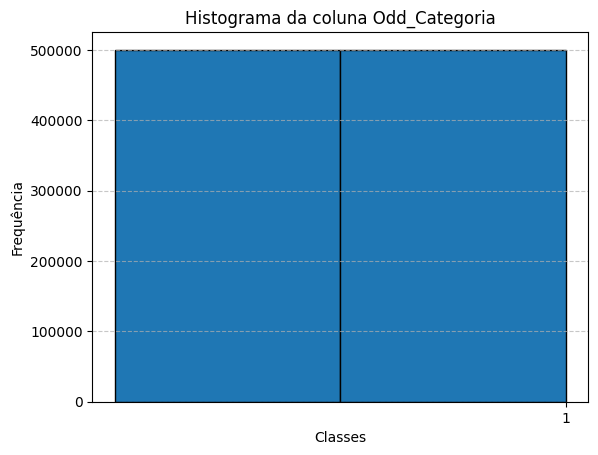

In [ ]:
# Configurar o histograma
plt.hist(data['Odd_Categoria'], bins=2, edgecolor='k')  # O número de bins deve corresponder ao número de classes (12 no seu caso)
plt.title('Histograma da coluna Odd_Categoria')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 2))  # Rótulos do eixo x de 1 a 12
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()

In [17]:
data2 = data

In [18]:
# Crie as colunas "entrada" e "saida" deslocando a coluna "horario" para cima
new_data = pd.DataFrame()
t = 145
for i in range(1,t):
  name = 'odd_entrada' + str(i)
  new_data[name] = data['Odd'].shift(i)
  new_data = new_data.drop(new_data.index[0])

# Visualize o DataFrame new_data
print(new_data)


        odd_entrada1  odd_entrada2  odd_entrada3  odd_entrada4  odd_entrada5  \
144             1.62          1.63         24.34          4.43          1.73   
145             1.00          1.62          1.63         24.34          4.43   
146             1.00          1.00          1.62          1.63         24.34   
147             1.44          1.00          1.00          1.62          1.63   
148             4.15          1.44          1.00          1.00          1.62   
...              ...           ...           ...           ...           ...   
999984          6.76          1.48          1.73          1.39          3.23   
999985          1.71          6.76          1.48          1.73          1.39   
999986          5.16          1.71          6.76          1.48          1.73   
999987          1.23          5.16          1.71          6.76          1.48   
999988          9.00          1.23          5.16          1.71          6.76   

        odd_entrada6  odd_entrada7  odd

In [19]:
data = pd.concat([data, new_data], axis = 1)

data = data.drop(data.index[0]).reset_index(drop=True)

print(data)

          Odd  odd_entrada1  odd_entrada2  odd_entrada3  odd_entrada4  \
0        1.19           NaN           NaN           NaN           NaN   
1        5.92           NaN           NaN           NaN           NaN   
2        1.11           NaN           NaN           NaN           NaN   
3        1.06           NaN           NaN           NaN           NaN   
4       13.73           NaN           NaN           NaN           NaN   
...       ...           ...           ...           ...           ...   
999983   1.71          6.76          1.48          1.73          1.39   
999984   5.16          1.71          6.76          1.48          1.73   
999985   1.23          5.16          1.71          6.76          1.48   
999986   9.00          1.23          5.16          1.71          6.76   
999987   2.26          9.00          1.23          5.16          1.71   

        odd_entrada5  odd_entrada6  odd_entrada7  odd_entrada8  odd_entrada9  \
0                NaN           NaN         

In [20]:
data3 = data

In [21]:
data = data.tail(999840).reset_index(drop=True)
data

,Odd,odd_entrada1,odd_entrada2,odd_entrada3,odd_entrada4,odd_entrada5,odd_entrada6,odd_entrada7,odd_entrada8,odd_entrada9,...,odd_entrada135,odd_entrada136,odd_entrada137,odd_entrada138,odd_entrada139,odd_entrada140,odd_entrada141,odd_entrada142,odd_entrada143,odd_entrada144
0,4.72,1.00,4.15,1.44,1.00,1.00,1.62,1.63,24.34,4.43,...,1.74,2.14,1.18,2.51,4.08,1.22,4.96,14.10,1.59,13.73
1,3.68,4.72,1.00,4.15,1.44,1.00,1.00,1.62,1.63,24.34,...,1.16,1.74,2.14,1.18,2.51,4.08,1.22,4.96,14.10,1.59
2,360.61,3.68,4.72,1.00,4.15,1.44,1.00,1.00,1.62,1.63,...,8.55,1.16,1.74,2.14,1.18,2.51,4.08,1.22,4.96,14.10
3,1.55,360.61,3.68,4.72,1.00,4.15,1.44,1.00,1.00,1.62,...,1.58,8.55,1.16,1.74,2.14,1.18,2.51,4.08,1.22,4.96
4,1.11,1.55,360.61,3.68,4.72,1.00,4.15,1.44,1.00,1.00,...,1.13,1.58,8.55,1.16,1.74,2.14,1.18,2.51,4.08,1.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999835,1.71,6.76,1.48,1.73,1.39,3.23,1.59,1.10,6.43,1.65,...,7.16,10.05,1.11,6.08,4.74,2.68,1.23,2.11,27.22,1.23
999836,5.16,1.71,6.76,1.48,1.73,1.39,3.23,1.59,1.10,6.43,...,1.66,7.16,10.05,1.11,6.08,4.74,2.68,1.23,2.11,27.22
999837,1.23,5.16,1.71,6.76,1.48,1.73,1.39,3.23,1.59,1.10,...,1.36,1.66,7.16,10.05,1.11,6.08,4.74,2.68,1.23,2.11
999838,9.00,1.23,5.16,1.71,6.76,1.48,1.73,1.39,3.23,1.59,...,2.76,1.36,1.66,7.16,10.05,1.11,6.08,4.74,2.68,1.23


In [22]:
data.describe()

,Odd,odd_entrada1,odd_entrada2,odd_entrada3,odd_entrada4,odd_entrada5,odd_entrada6,odd_entrada7,odd_entrada8,odd_entrada9,...,odd_entrada135,odd_entrada136,odd_entrada137,odd_entrada138,odd_entrada139,odd_entrada140,odd_entrada141,odd_entrada142,odd_entrada143,odd_entrada144
count,999840.000000,999840.000000,999840.000000,999840.000000,999840.000000,999840.000000,999840.000000,999840.000000,999840.000000,999840.000000,...,999840.000000,999840.000000,999840.000000,999840.000000,999840.000000,999840.000000,999840.000000,999840.000000,999840.000000,999840.000000
mean,13.522326,13.522325,13.522320,13.522320,13.522316,13.522316,13.522310,13.522311,13.522333,13.522336,...,13.522693,13.522694,13.522692,13.522693,13.522696,13.522690,13.522685,13.522698,13.522693,13.522702
std,936.191148,936.191148,936.191148,936.191148,936.191149,936.191149,936.191149,936.191149,936.191149,936.191149,...,936.191165,936.191165,936.191165,936.191165,936.191165,936.191165,936.191165,936.191165,936.191165,936.191165
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.310000,1.310000,1.310000,1.310000,1.310000,1.310000,1.310000,1.310000,1.310000,1.310000,...,1.310000,1.310000,1.310000,1.310000,1.310000,1.310000,1.310000,1.310000,1.310000,1.310000
50%,1.970000,1.970000,1.970000,1.970000,1.970000,1.970000,1.970000,1.970000,1.970000,1.970000,...,1.970000,1.970000,1.970000,1.970000,1.970000,1.970000,1.970000,1.970000,1.970000,1.970000
75%,3.930000,3.930000,3.930000,3.930000,3.930000,3.930000,3.930000,3.930000,3.930000,3.930000,...,3.930000,3.930000,3.930000,3.930000,3.930000,3.930000,3.930000,3.930000,3.930000,3.930000
max,571831.230000,571831.230000,571831.230000,571831.230000,571831.230000,571831.230000,571831.230000,571831.230000,571831.230000,571831.230000,...,571831.230000,571831.230000,571831.230000,571831.230000,571831.230000,571831.230000,571831.230000,571831.230000,571831.230000,571831.230000


In [23]:
data.to_csv('Odd_New.csv')

In [ ]:
# Crie as colunas "entrada" e "saida" deslocando a coluna "horario" para cima
new_data = pd.DataFrame()

new_data['odd_entrada1'] = data['Odd'].shift(1)

new_data = new_data.drop(new_data.index[0])
# Visualize o DataFrame new_data
print(new_data)

data = pd.concat([data, new_data], axis = 1)

data = data.drop(data.index[0]).reset_index(drop=True)

print(data)

In [ ]:
data1 = data[['Odd_Categoria','odd_entrada']]
data1.tail(250000).reset_index(drop=True)

,Odd_Categoria,odd_entrada
0,3,4.0
1,2,3.0
2,1,2.0
3,2,1.0
4,1,2.0
...,...,...
249995,3,5.0
249996,5,3.0
249997,1,5.0
249998,5,1.0


In [ ]:
data = data1

In [ ]:
data['odd_categoria_media_movel5'] = data['odd_entrada'].rolling(window=5).mean()
data['odd_categoria_media_movel8'] = data['odd_entrada'].rolling(window=8).mean()
data['odd_categoria_media_movel13'] = data['odd_entrada'].rolling(window=13).mean()
data['odd_categoria_media_movel21'] = data['odd_entrada'].rolling(window=21).mean()
data['odd_categoria_media_movel34'] = data['odd_entrada'].rolling(window=34).mean()
data['odd_categoria_media_movel55'] = data['odd_entrada'].rolling(window=55).mean()
data['odd_categoria_media_movel89'] = data['odd_entrada'].rolling(window=89).mean()
data['odd_categoria_media_movel144'] = data['odd_entrada'].rolling(window=144).mean()
data['odd_categoria_media_movel233'] = data['odd_entrada'].rolling(window=233).mean()
data['odd_categoria_media_movel377'] = data['odd_entrada'].rolling(window=377).mean()
data['odd_categoria_media_movel610'] = data['odd_entrada'].rolling(window=610).mean()
data['odd_categoria_media_movel987'] = data['odd_entrada'].rolling(window=987).mean()
data['odd_categoria_media_movel1597'] = data['odd_entrada'].rolling(window=1597).mean()

data = data.fillna(data.mean())  # Preencher com a média da coluna

# Estatísticas Descritivas
data['odd_mediana5'] = data['odd_entrada'].rolling(window=5).median()
data['odd_mediana8'] = data['odd_entrada'].rolling(window=8).median()
data['odd_mediana13'] = data['odd_entrada'].rolling(window=13).median()
data['odd_mediana21'] = data['odd_entrada'].rolling(window=21).median()
data['odd_mediana34'] = data['odd_entrada'].rolling(window=34).median()
data['odd_mediana55'] = data['odd_entrada'].rolling(window=55).median()
data['odd_mediana89'] = data['odd_entrada'].rolling(window=89).median()
data['odd_mediana144'] = data['odd_entrada'].rolling(window=144).median()
data['odd_mediana233'] = data['odd_entrada'].rolling(window=233).median()
data['odd_mediana377'] = data['odd_entrada'].rolling(window=377).median()
data['odd_mediana610'] = data['odd_entrada'].rolling(window=610).median()
data['odd_mediana987'] = data['odd_entrada'].rolling(window=987).median()
data['odd_mediana1597'] = data['odd_entrada'].rolling(window=1597).median()

data['odd_desvio_padrao5'] = data['odd_entrada'].rolling(window=5).std()
data['odd_desvio_padrao8'] = data['odd_entrada'].rolling(window=8).std()
data['odd_desvio_padrao13'] = data['odd_entrada'].rolling(window=13).std()
data['odd_desvio_padrao21'] = data['odd_entrada'].rolling(window=21).std()
data['odd_desvio_padrao34'] = data['odd_entrada'].rolling(window=34).std()
data['odd_desvio_padrao55'] = data['odd_entrada'].rolling(window=55).std()
data['odd_desvio_padrao89'] = data['odd_entrada'].rolling(window=89).std()
data['odd_desvio_padrao144'] = data['odd_entrada'].rolling(window=144).std()
data['odd_desvio_padrao233'] = data['odd_entrada'].rolling(window=233).std()
data['odd_desvio_padrao377'] = data['odd_entrada'].rolling(window=377).std()
data['odd_desvio_padrao610'] = data['odd_entrada'].rolling(window=610).std()
data['odd_desvio_padrao987'] = data['odd_entrada'].rolling(window=987).std()
data['odd_desvio_padrao1597'] = data['odd_entrada'].rolling(window=1597).std()

data['odd_min5'] = data['odd_entrada'].rolling(window=5).min()
data['odd_min8'] = data['odd_entrada'].rolling(window=8).min()
data['odd_min13'] = data['odd_entrada'].rolling(window=13).min()
data['odd_min21'] = data['odd_entrada'].rolling(window=21).min()
data['odd_min34'] = data['odd_entrada'].rolling(window=34).min()
data['odd_min55'] = data['odd_entrada'].rolling(window=55).min()
data['odd_min89'] = data['odd_entrada'].rolling(window=89).min()
data['odd_min144'] = data['odd_entrada'].rolling(window=144).min()
data['odd_min233'] = data['odd_entrada'].rolling(window=233).min()
data['odd_min377'] = data['odd_entrada'].rolling(window=377).min()
data['odd_min610'] = data['odd_entrada'].rolling(window=610).min()


data['odd_max5'] = data['odd_entrada'].rolling(window=5).max()
data['odd_max8'] = data['odd_entrada'].rolling(window=8).max()
data['odd_max13'] = data['odd_entrada'].rolling(window=13).max()
data['odd_max21'] = data['odd_entrada'].rolling(window=21).max()
data['odd_max34'] = data['odd_entrada'].rolling(window=34).max()
data['odd_max55'] = data['odd_entrada'].rolling(window=55).max()
data['odd_max89'] = data['odd_entrada'].rolling(window=89).max()
data['odd_max144'] = data['odd_entrada'].rolling(window=144).max()
data['odd_max233'] = data['odd_entrada'].rolling(window=233).max()
data['odd_max377'] = data['odd_entrada'].rolling(window=377).max()
data['odd_max610'] = data['odd_entrada'].rolling(window=610).max()

# Tendência de Média Móvel
data['tendencia_media_movel5'] = data['odd_categoria_media_movel5'].diff()
data['tendencia_media_movel8'] = data['odd_categoria_media_movel8'].diff()
data['tendencia_media_movel13'] = data['odd_categoria_media_movel13'].diff()
data['tendencia_media_movel21'] = data['odd_categoria_media_movel21'].diff()
data['tendencia_media_movel34'] = data['odd_categoria_media_movel34'].diff()
data['tendencia_media_movel55'] = data['odd_categoria_media_movel55'].diff()
data['tendencia_media_movel89'] = data['odd_categoria_media_movel89'].diff()
data['tendencia_media_movel144'] = data['odd_categoria_media_movel144'].diff()
data['tendencia_media_movel233'] = data['odd_categoria_media_movel233'].diff()
data['tendencia_media_movel377'] = data['odd_categoria_media_movel377'].diff()
data['tendencia_media_movel610'] = data['odd_categoria_media_movel610'].diff()

# Frequência de Categorias (assumindo que 'Odd_Categoria' é categórico)
data['categoria_frequencia5'] = data['odd_entrada'].rolling(window=5).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia8'] = data['odd_entrada'].rolling(window=8).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia13'] = data['odd_entrada'].rolling(window=13).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia21'] = data['odd_entrada'].rolling(window=21).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia34'] = data['odd_entrada'].rolling(window=34).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia55'] = data['odd_entrada'].rolling(window=55).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia89'] = data['odd_entrada'].rolling(window=89).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia144'] = data['odd_entrada'].rolling(window=144).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia233'] = data['odd_entrada'].rolling(window=233).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia377'] = data['odd_entrada'].rolling(window=377).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia610'] = data['odd_entrada'].rolling(window=610).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia987'] = data['odd_entrada'].rolling(window=987).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia1597'] = data['odd_entrada'].rolling(window=1597).apply(lambda x: x.value_counts().idxmax())

data['entropia_rolling5'] = data['odd_entrada'].rolling(window=5).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling8'] = data['odd_entrada'].rolling(window=8).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling13'] = data['odd_entrada'].rolling(window=13).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling21'] = data['odd_entrada'].rolling(window=21).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling34'] = data['odd_entrada'].rolling(window=34).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling55'] = data['odd_entrada'].rolling(window=55).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling89'] = data['odd_entrada'].rolling(window=89).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling144'] = data['odd_entrada'].rolling(window=144).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling233'] = data['odd_entrada'].rolling(window=233).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling377'] = data['odd_entrada'].rolling(window=377).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling610'] = data['odd_entrada'].rolling(window=610).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling987'] = data['odd_entrada'].rolling(window=987).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling1597'] = data['odd_entrada'].rolling(window=1597).apply(lambda x: entropy(x.value_counts(normalize=True)))

# Contagem de repetições das categorias
data['categoria_contagem'] = data['odd_entrada'].map(data['odd_entrada'].value_counts())

# Tendência das Odds
data['odd_tendencia'] = data['odd_entrada'].diff()

data['percentil25_rolling5'] = data['odd_entrada'].rolling(window=5).quantile(0.25)
data['percentil25_rolling8'] = data['odd_entrada'].rolling(window=8).quantile(0.25)
data['percentil25_rolling13'] = data['odd_entrada'].rolling(window=13).quantile(0.25)
data['percentil25_rolling21'] = data['odd_entrada'].rolling(window=21).quantile(0.25)
data['percentil25_rolling34'] = data['odd_entrada'].rolling(window=34).quantile(0.25)
data['percentil25_rolling55'] = data['odd_entrada'].rolling(window=55).quantile(0.25)
data['percentil25_rolling89'] = data['odd_entrada'].rolling(window=89).quantile(0.25)
data['percentil25_rolling144'] = data['odd_entrada'].rolling(window=144).quantile(0.25)
data['percentil25_rolling233'] = data['odd_entrada'].rolling(window=233).quantile(0.25)
data['percentil25_rolling377'] = data['odd_entrada'].rolling(window=377).quantile(0.25)
data['percentil25_rolling610'] = data['odd_entrada'].rolling(window=610).quantile(0.25)
data['percentil25_rolling987'] = data['odd_entrada'].rolling(window=987).quantile(0.25)
data['percentil25_rolling1597'] = data['odd_entrada'].rolling(window=1597).quantile(0.25)

data['percentil75_rolling5'] = data['odd_entrada'].rolling(window=5).quantile(0.75)
data['percentil75_rolling8'] = data['odd_entrada'].rolling(window=8).quantile(0.75)
data['percentil75_rolling13'] = data['odd_entrada'].rolling(window=13).quantile(0.75)
data['percentil75_rolling21'] = data['odd_entrada'].rolling(window=21).quantile(0.75)
data['percentil75_rolling34'] = data['odd_entrada'].rolling(window=34).quantile(0.75)
data['percentil75_rolling55'] = data['odd_entrada'].rolling(window=55).quantile(0.75)
data['percentil75_rolling89'] = data['odd_entrada'].rolling(window=89).quantile(0.75)
data['percentil75_rolling144'] = data['odd_entrada'].rolling(window=144).quantile(0.75)
data['percentil75_rolling233'] = data['odd_entrada'].rolling(window=233).quantile(0.75)
data['percentil75_rolling377'] = data['odd_entrada'].rolling(window=377).quantile(0.75)
data['percentil75_rolling610'] = data['odd_entrada'].rolling(window=610).quantile(0.75)
data['percentil75_rolling987'] = data['odd_entrada'].rolling(window=987).quantile(0.75)
data['percentil75_rolling1597'] = data['odd_entrada'].rolling(window=1597).quantile(0.75)

data['variancia_rolling5'] = data['odd_entrada'].rolling(window=5).var()
data['variancia_rolling8'] = data['odd_entrada'].rolling(window=8).var()
data['variancia_rolling13'] = data['odd_entrada'].rolling(window=13).var()
data['variancia_rolling21'] = data['odd_entrada'].rolling(window=21).var()
data['variancia_rolling34'] = data['odd_entrada'].rolling(window=34).var()
data['variancia_rolling55'] = data['odd_entrada'].rolling(window=55).var()
data['variancia_rolling89'] = data['odd_entrada'].rolling(window=89).var()
data['variancia_rolling144'] = data['odd_entrada'].rolling(window=144).var()
data['variancia_rolling233'] = data['odd_entrada'].rolling(window=233).var()
data['variancia_rolling377'] = data['odd_entrada'].rolling(window=377).var()
data['variancia_rolling610'] = data['odd_entrada'].rolling(window=610).var()
data['variancia_rolling987'] = data['odd_entrada'].rolling(window=987).var()
data['variancia_rolling1597'] = data['odd_entrada'].rolling(window=1597).var()

# Remova linhas com valores ausentes resultantes das operações de janelas
data = data.fillna(data.mean())

# Verifique se há valores nulos em cada coluna
valores_ausentes = data.isna().sum()

# Exiba as colunas com valores nulos e suas contagens
print(valores_ausentes[valores_ausentes > 0])

data.head(20)
data.shape

Series([], dtype: int64)


(999988, 141)

In [ ]:
data.to_csv("New_Category_order.csv")

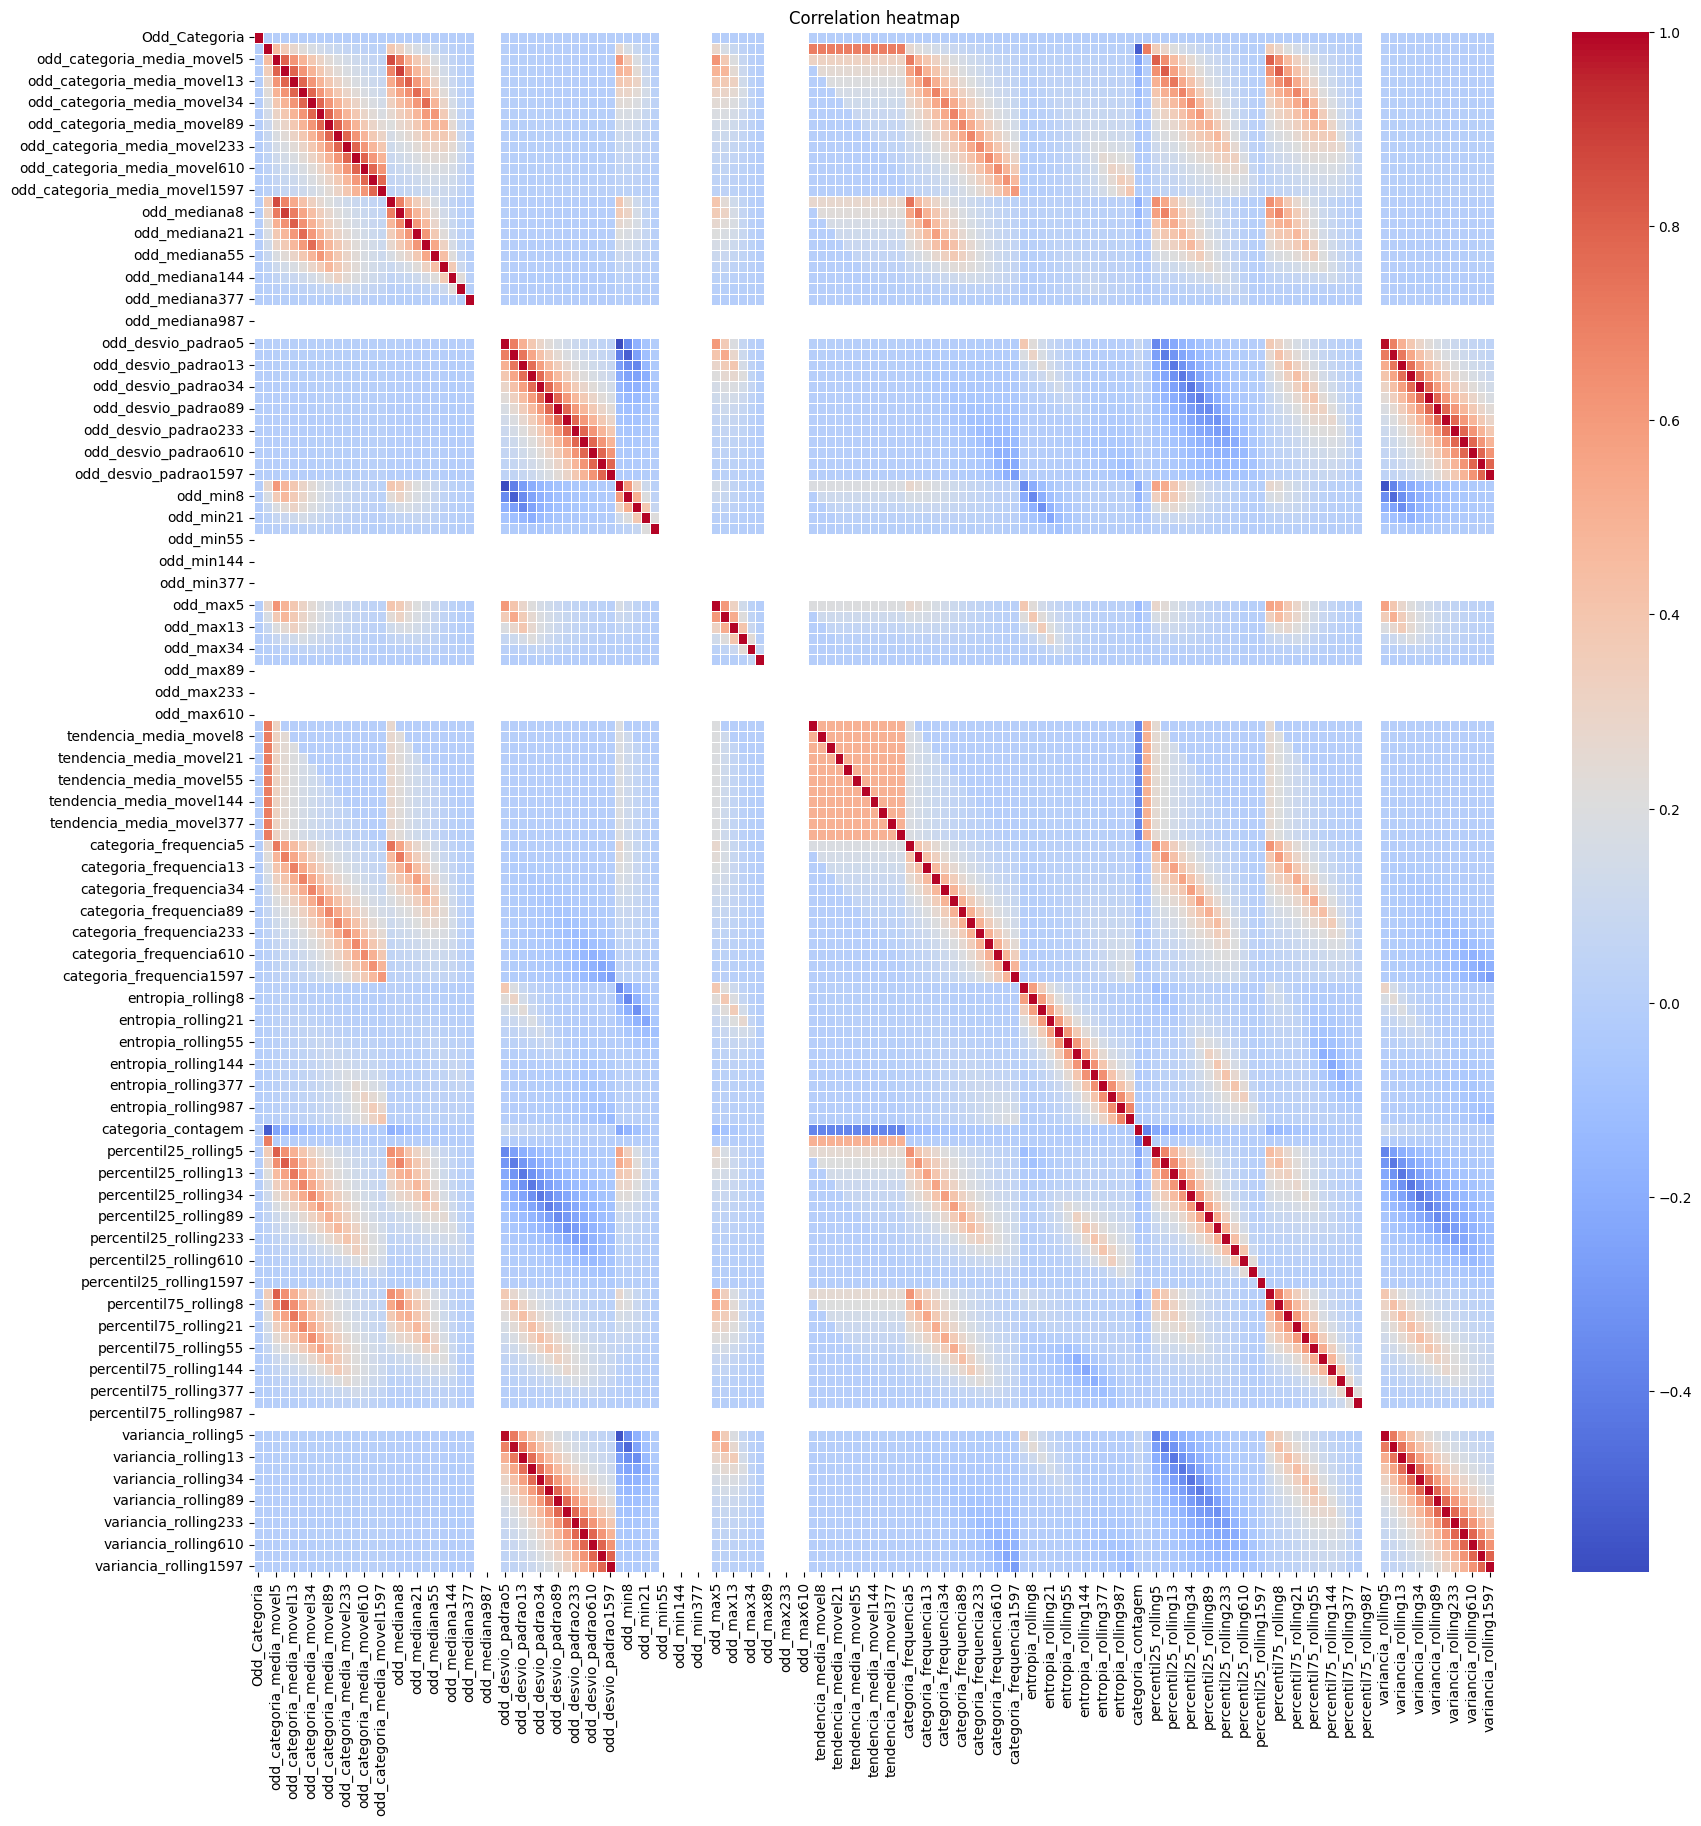

In [ ]:
# Calculando a matriz de correlação
corr_matrix = data.corr()

# Criando o heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=.5)
plt.title('Correlation heatmap')
plt.show()

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/Aviator/New_Category.csv'
data = pd.read_csv(path)
print(data)

        Unnamed: 0    Odd  Odd_Categoria  odd_entrada  \
0                0   1.19              1          1.0   
1                1   5.92              5          1.0   
2                2   1.11              1          5.0   
3                3   1.06              1          1.0   
4                4  13.73              5          1.0   
...            ...    ...            ...          ...   
999983      999983   1.71              3          5.0   
999984      999984   5.16              5          3.0   
999985      999985   1.23              1          5.0   
999986      999986   9.00              5          1.0   
999987      999987   2.26              3          5.0   

        odd_categoria_media_movel5  odd_categoria_media_movel10  \
0                         2.977616                     2.977616   
1                         2.977616                     2.977616   
2                         2.977616                     2.977616   
3                         2.977616             

In [ ]:
data1 = data1.tail(500000).reset_index(drop=True)

In [ ]:
#data1 = data[['Odd_Categoria','odd_entrada']]

data1.to_csv("order.csv")

In [ ]:
print(data.columns)

Index(['Odd_Categoria', 'odd_entrada', 'odd_categoria_media_movel5',
       'odd_categoria_media_movel8', 'odd_categoria_media_movel13',
       'odd_categoria_media_movel21', 'odd_categoria_media_movel34',
       'odd_categoria_media_movel55', 'odd_categoria_media_movel89',
       'odd_categoria_media_movel144',
       ...
       'variancia_rolling21', 'variancia_rolling34', 'variancia_rolling55',
       'variancia_rolling89', 'variancia_rolling144', 'variancia_rolling233',
       'variancia_rolling377', 'variancia_rolling610', 'variancia_rolling987',
       'variancia_rolling1597'],
      dtype='object', length=141)


In [ ]:
data.describe()

,Odd_Categoria,odd_entrada,odd_categoria_media_movel5,odd_categoria_media_movel8,odd_categoria_media_movel13,odd_categoria_media_movel21,odd_categoria_media_movel34,odd_categoria_media_movel55,odd_categoria_media_movel89,odd_categoria_media_movel144,...,variancia_rolling21,variancia_rolling34,variancia_rolling55,variancia_rolling89,variancia_rolling144,variancia_rolling233,variancia_rolling377,variancia_rolling610,variancia_rolling987,variancia_rolling1597
count,999988.000000,999988.000000,999988.000000,999988.000000,999988.000000,999988.000000,999988.000000,999988.000000,999988.000000,999988.000000,...,999988.000000,999988.000000,999988.000000,999988.000000,999988.000000,999988.000000,999988.000000,999988.000000,999988.000000,999988.000000
mean,2.977617,2.977615,2.977616,2.977616,2.977616,2.977615,2.977617,2.977618,2.977624,2.977630,...,2.013911,2.013814,2.014058,2.014289,2.014431,2.014569,2.014615,2.014701,2.014785,2.014815
std,1.419409,1.419410,0.634311,0.501811,0.394214,0.310967,0.245209,0.193069,0.151854,0.119477,...,0.392158,0.300599,0.233031,0.181372,0.141376,0.110442,0.086212,0.067766,0.053336,0.042081
min,1.000000,1.000000,1.000000,1.000000,1.384615,1.666667,1.823529,2.000000,2.359551,2.493056,...,0.390476,0.695187,0.998653,1.208887,1.457605,1.579658,1.697838,1.762265,1.807156,1.863828
25%,2.000000,2.000000,2.600000,2.625000,2.692308,2.761905,2.823529,2.854545,2.876404,2.895833,...,1.747619,1.811052,1.853872,1.891471,1.919143,1.939359,1.956417,1.968624,1.979003,1.987057
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.970588,2.981818,2.977528,2.979167,...,2.014286,2.008021,2.015488,2.014045,2.013792,2.014873,2.014970,2.015925,2.015341,2.014878
75%,4.000000,4.000000,3.400000,3.375000,3.230769,3.190476,3.147059,3.109091,3.078652,3.055556,...,2.290476,2.211230,2.173064,2.135853,2.110140,2.089611,2.073480,2.061794,2.051550,2.044125
max,5.000000,5.000000,5.000000,5.000000,4.615385,4.523810,4.147059,4.036364,3.719101,3.486111,...,3.747619,3.412656,3.031650,2.761236,2.586636,2.474286,2.341893,2.257366,2.195702,2.165381


In [ ]:
# Verifique se há valores nulos em cada coluna
valores_ausentes = data.isna().sum()

# Exiba as colunas com valores nulos e suas contagens
print(valores_ausentes[valores_ausentes > 0])

Series([], dtype: int64)


In [ ]:
from scipy.stats import f_oneway

# Exemplo para uma variável 'X'
grupos = [data[data['Odd_Categoria'] == cat][['odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
       'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
       'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
       'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
       'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10',
       'odd_min20', 'odd_min40', 'odd_min80', 'odd_max5', 'odd_max10',
       'odd_max20', 'odd_max40', 'odd_max80', 'tendencia_media_movel5',
       'tendencia_media_movel10', 'tendencia_media_movel20',
       'tendencia_media_movel40', 'tendencia_media_movel80',
       'tendencia_media_movel160', 'tendencia_media_movel320',
       'tendencia_media_movel640', 'categoria_frequencia5',
       'categoria_frequencia10', 'categoria_frequencia20',
       'categoria_frequencia40', 'categoria_frequencia80',
       'categoria_frequencia160', 'categoria_frequencia320',
       'categoria_frequencia640', 'entropia_rolling5', 'entropia_rolling10',
       'entropia_rolling20', 'entropia_rolling40', 'entropia_rolling80',
       'entropia_rolling160', 'entropia_rolling320', 'entropia_rolling640',
       'correlacao_odd_categoria_media_movel5',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel20',
       'correlacao_odd_categoria_media_movel40',
       'correlacao_odd_categoria_media_movel80',
       'correlacao_odd_categoria_media_movel160',
       'correlacao_odd_categoria_media_movel320',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'odd_tendencia', 'percentil25_rolling5', 'percentil25_rolling10',
       'percentil25_rolling20', 'percentil25_rolling40',
       'percentil25_rolling80', 'percentil25_rolling160',
       'percentil25_rolling320', 'percentil25_rolling640',
       'percentil75_rolling5', 'percentil75_rolling10',
       'percentil75_rolling20', 'percentil75_rolling40',
       'percentil75_rolling80', 'percentil75_rolling160',
       'percentil75_rolling320', 'percentil75_rolling640',
       'variancia_rolling5', 'variancia_rolling10', 'variancia_rolling20',
       'variancia_rolling40', 'variancia_rolling80', 'variancia_rolling160',
       'variancia_rolling320', 'variancia_rolling640']] for cat in data['Odd_Categoria'].unique()]
f_oneway(*grupos)


F_onewayResult(statistic=array([0.19938605, 0.39895933, 0.56367681, 1.86784196, 3.0249274 ,
       1.12134938, 0.55198506, 0.49258942, 0.8215784 , 0.1151016 ,
       0.3423605 , 1.45418784, 3.87526419, 0.91748154, 2.43554239,
       1.34342537,        nan, 0.8853757 , 0.7046638 , 1.39465955,
       0.77787145, 1.10948626, 0.82386027, 0.50288214, 0.17964432,
       1.06202337, 1.17897905, 0.26999072, 0.84618818,        nan,
       0.73528127, 1.1050181 , 0.5088148 , 0.2734451 ,        nan,
       0.64229765, 0.2886119 , 0.61012257, 0.5107437 , 0.91782893,
       0.6682136 , 0.58399435, 0.13405014, 0.71525746, 1.70606619,
       1.3080761 , 2.07233402, 0.59826994, 0.27896627, 0.34904629,
       1.76676102, 0.54214661, 0.39831287, 2.97727783, 2.61020977,
       2.40192663, 0.92685393, 1.29802792, 2.6081962 , 0.41687456,
       0.35634207, 0.46557502, 1.46315969, 1.10487056, 0.94399546,
       0.39876588, 0.5190374 , 1.95519474, 0.08210403, 0.20714554,
       0.7503157 , 2.0889079 , 2.4312

In [ ]:
from scipy.stats import spearmanr, pearsonr

colunas = ['odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
       'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
       'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
       'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
       'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10',
       'odd_min20', 'odd_min40', 'odd_min80', 'odd_max5', 'odd_max10',
       'odd_max20', 'odd_max40', 'odd_max80', 'tendencia_media_movel5',
       'tendencia_media_movel10', 'tendencia_media_movel20',
       'tendencia_media_movel40', 'tendencia_media_movel80',
       'tendencia_media_movel160', 'tendencia_media_movel320',
       'tendencia_media_movel640', 'categoria_frequencia5',
       'categoria_frequencia10', 'categoria_frequencia20',
       'categoria_frequencia40', 'categoria_frequencia80',
       'categoria_frequencia160', 'categoria_frequencia320',
       'categoria_frequencia640', 'entropia_rolling5', 'entropia_rolling10',
       'entropia_rolling20', 'entropia_rolling40', 'entropia_rolling80',
       'entropia_rolling160', 'entropia_rolling320', 'entropia_rolling640',
       'correlacao_odd_categoria_media_movel5',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel20',
       'correlacao_odd_categoria_media_movel40',
       'correlacao_odd_categoria_media_movel80',
       'correlacao_odd_categoria_media_movel160',
       'correlacao_odd_categoria_media_movel320',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'odd_tendencia', 'percentil25_rolling5', 'percentil25_rolling10',
       'percentil25_rolling20', 'percentil25_rolling40',
       'percentil25_rolling80', 'percentil25_rolling160',
       'percentil25_rolling320', 'percentil25_rolling640',
       'percentil75_rolling5', 'percentil75_rolling10',
       'percentil75_rolling20', 'percentil75_rolling40',
       'percentil75_rolling80', 'percentil75_rolling160',
       'percentil75_rolling320', 'percentil75_rolling640',
       'variancia_rolling5', 'variancia_rolling10', 'variancia_rolling20',
       'variancia_rolling40', 'variancia_rolling80', 'variancia_rolling160',
       'variancia_rolling320', 'variancia_rolling640']

# Criando um DataFrame para armazenar os resultados
resultados_correlacao = pd.DataFrame(columns=['Variável', 'Correlação de Pearson', 'P-valor'])

for coluna in colunas:
    correlacao, p_valor = pearsonr(data['Odd_Categoria'], data[coluna])
    resultados_correlacao = resultados_correlacao.append({'Variável': coluna, 'Correlação de Pearson': correlacao, 'P-valor': p_valor}, ignore_index=True)

# Criando um DataFrame para armazenar os resultados
resultados_correlacaoS = pd.DataFrame(columns=['Variável', 'Correlação de spearman', 'P-valor'])

for coluna in colunas:
    correlacao, p_valor = spearmanr(data['Odd_Categoria'], data[coluna])
    resultados_correlacao = resultados_correlacaoS.append({'Variável': coluna, 'Correlação de spearman': correlacao, 'P-valor': p_valor}, ignore_index=True)



In [ ]:
print(resultados_correlacao)

               Variável  Correlação de spearman  P-valor
0  variancia_rolling640               -0.000064  0.94912


In [ ]:
print(resultados_correlacaoS)

Empty DataFrame
Columns: [Variável, Correlação de spearman, P-valor]
Index: []


In [ ]:
data1 = data
data = data.tail(250000).reset_index(drop=True)
# Excluir a primeira coluna
data2 = data.iloc[:, 1:]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import numpy as np

# Separar recursos (X) e rótulos (y)
X1 = data2.values
y1 = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Divida seus dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(24, activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

# Experimente diferentes funções de ativação, taxa de aprendizado e otimizador
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Aumente o número de épocas
model.fit(X_train, y_train, epochs=250, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia nos dados de teste: {test_accuracy}')

# Fazer previsões
predictions = model.predict(X_test)

# Arredondar as previsões para obter rótulos de classe
predicted_labels = np.argmax(predictions, axis=1)

# Calcular o F1-Score
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f'F1-Score do modelo: {f1}')


Epoch 1/250
2813/2813 [==============================] - 12s 4ms/step - loss: 1.6277 - accuracy: 0.2024 - val_loss: 1.6118 - val_accuracy: 0.1988
Epoch 2/250
2813/2813 [==============================] - 11s 4ms/step - loss: 1.6123 - accuracy: 0.2039 - val_loss: 1.6108 - val_accuracy: 0.2081
Epoch 3/250
2813/2813 [==============================] - 10s 4ms/step - loss: 1.6107 - accuracy: 0.2054 - val_loss: 1.6103 - val_accuracy: 0.2082
Epoch 4/250
2813/2813 [==============================] - 10s 4ms/step - loss: 1.6097 - accuracy: 0.2079 - val_loss: 1.6097 - val_accuracy: 0.2122
Epoch 5/250
2813/2813 [==============================] - 10s 4ms/step - loss: 1.6093 - accuracy: 0.2087 - val_loss: 1.6098 - val_accuracy: 0.1945
Epoch 6/250
2813/2813 [==============================] - 10s 4ms/step - loss: 1.6092 - accuracy: 0.2087 - val_loss: 1.6096 - val_accuracy: 0.2104
Epoch 7/250
2813/2813 [==============================] - 10s 4ms/step - loss: 1.6091 - accuracy: 0.2085 - val_loss: 1.6091 -

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import numpy as np
from keras.optimizers import Nadam

# Separar recursos (X) e rótulos (y)
X1 = data2.values
y1 = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Divida seus dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)

model = keras.Sequential([
    keras.layers.Dense(160, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(320, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(480, activation='relu'),
    keras.layers.Dense(640, activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

# Experimente diferentes funções de ativação, taxa de aprendizado e otimizador
model.compile(optimizer=nadam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Aumente o número de épocas
model.fit(X_train, y_train, epochs=250, batch_size=160, validation_split=0.001, callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia nos dados de teste: {test_accuracy}')

# Fazer previsões
predictions = model.predict(X_test)

# Arredondar as previsões para obter rótulos de classe
predicted_labels = np.argmax(predictions, axis=1)

# Calcular o F1-Score
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f'F1-Score do modelo: {f1}')


Epoch 1/250
1249/1249 [==============================] - 14s 10ms/step - loss: 1.6459 - accuracy: 0.2022 - val_loss: 1.6207 - val_accuracy: 0.1550
Epoch 2/250
1249/1249 [==============================] - 13s 10ms/step - loss: 1.6139 - accuracy: 0.2047 - val_loss: 1.6100 - val_accuracy: 0.2350
Epoch 3/250
1249/1249 [==============================] - 13s 10ms/step - loss: 1.6114 - accuracy: 0.2066 - val_loss: 1.6075 - val_accuracy: 0.2600
Epoch 4/250
1249/1249 [==============================] - 13s 10ms/step - loss: 1.6101 - accuracy: 0.2080 - val_loss: 1.6094 - val_accuracy: 0.2100
Epoch 5/250
1249/1249 [==============================] - 13s 10ms/step - loss: 1.6094 - accuracy: 0.2091 - val_loss: 1.6114 - val_accuracy: 0.1950
Epoch 6/250
1249/1249 [==============================] - 13s 10ms/step - loss: 1.6091 - accuracy: 0.2114 - val_loss: 1.6093 - val_accuracy: 0.2000
Epoch 7/250
1249/1249 [==============================] - 13s 10ms/step - loss: 1.6089 - accuracy: 0.2110 - val_loss: 1

In [ ]:
data = data.tail(100000).reset_index(drop=True)
data2 = data.iloc[:, 1:]

A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 19ms/step
Precisão: 0.16175
Acurácia Direcional: 0.4235
Acurácia Direcional Ponderada: 0.58525


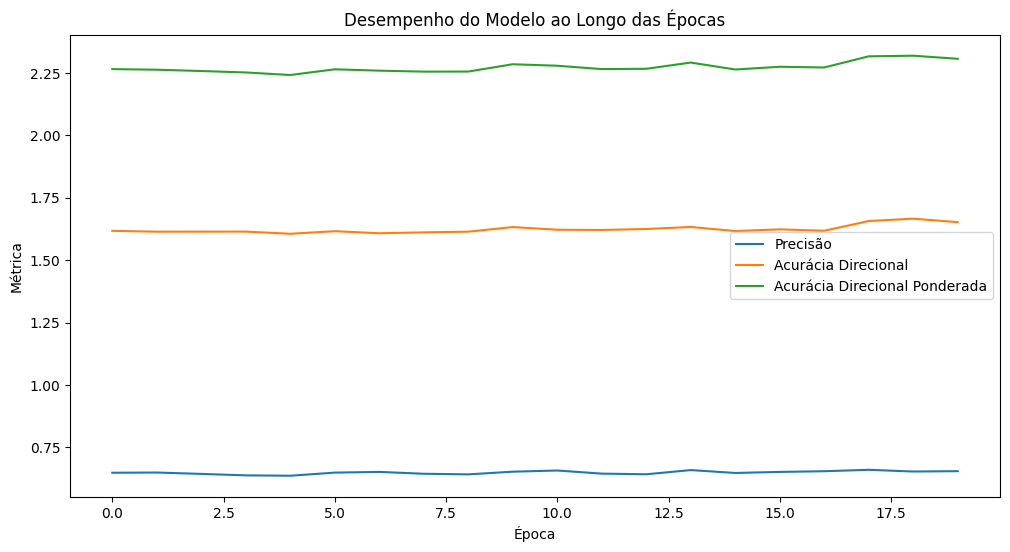

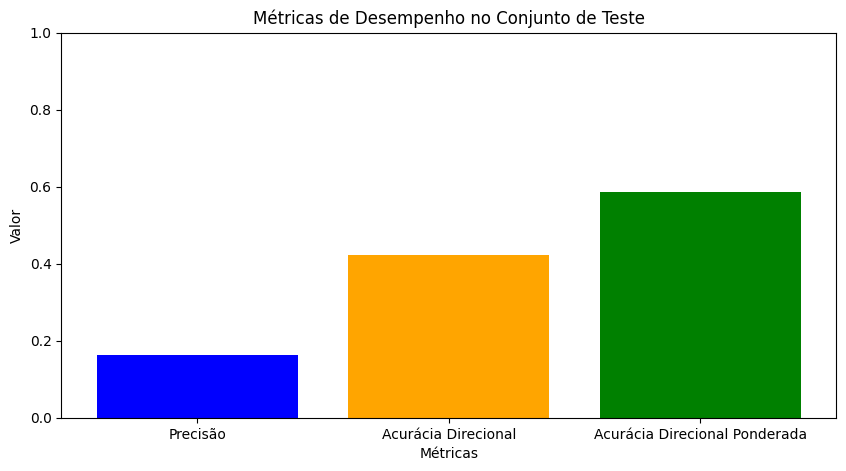

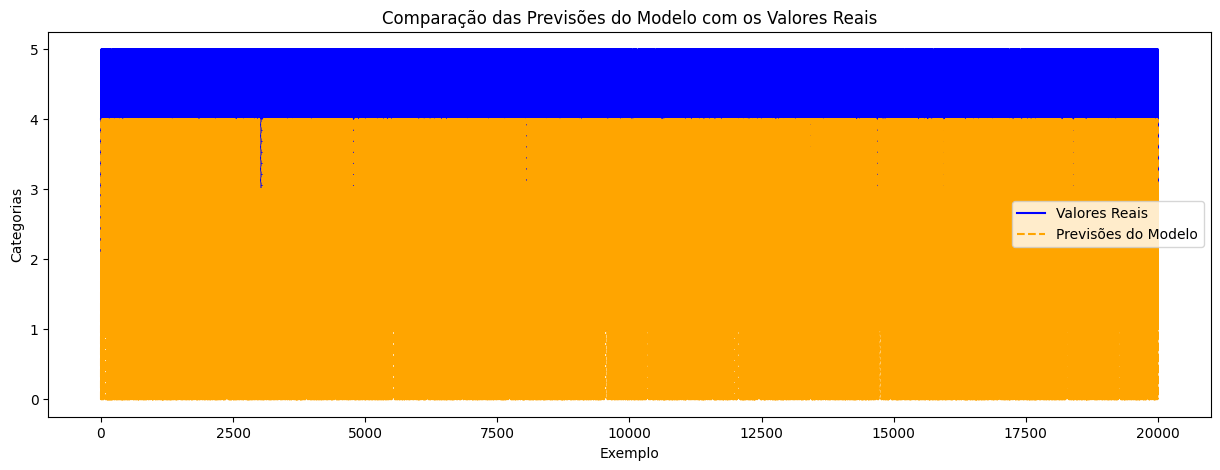

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from collections import deque
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


class DQNAgent:
  def __init__(self, n_states, n_actions, learning_rate, gamma, epsilon, buffer_size=10000):
        self.n_states = n_states
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.memory = deque(maxlen=buffer_size)

        # Crie a rede neural
        self.model = self.build_model()
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                           loss='sparse_categorical_crossentropy')

  def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(self.n_states,)),
            tf.keras.layers.Dense(8, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(self.n_actions, activation='softmax')
        ])
        return model

  def get_action(self, state):
    if np.random.random() < self.epsilon:
      return np.random.choice(self.n_actions)
    else:
      q_values = self.model.predict(state.reshape(1, -1), batch_size=1)
      return np.argmax(q_values)

  def remember(self, state, action, reward, next_state, done):
    self.memory.append((state, action, reward, next_state, done))

    # Restante do código permanece igual até o método 'replay'
  def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state.reshape(1, -1), batch_size=1)))
            target_f = self.model.predict(state.reshape(1, -1), batch_size=1)
            target_f[0][action] = target
            self.model.fit(state.reshape(1, -1), np.array([action]), epochs=1, verbose=0, batch_size=batch_size)

  def update_epsilon(self, decay_rate, min_epsilon):
    if self.epsilon > min_epsilon:
      self.epsilon *= decay_rate

def calculate_reward(action, true_action):
  base_reward = 10  # Recompensa base para acertos exatos
  good_error_reward = 5  # Recompensa para erros bons
  bad_error_penalty = -5  # Penalidade para erros ruins

  # Recompensas e penalidades adicionais para categorias específicas
  extra_good_reward = 3  # Recompensa adicional para erros bons próximos a categorias valiosas
  extra_bad_penalty = -3  # Penalidade adicional para erros ruins próximos a categorias valiosas
  valuable_categories = [3,4,5]

  if action == true_action:
    return base_reward
  elif action < true_action:
    reward = good_error_reward
    if true_action in valuable_categories and action in valuable_categories:
      reward += extra_good_reward  # Recompensa extra por estar próximo de categorias valiosas
    return reward
  else:
    penalty = bad_error_penalty
    if true_action in valuable_categories or action in valuable_categories:
      penalty += extra_bad_penalty  # Penalidade extra por estar distante de categorias valiosas
    return penalty

def normalize_data(features):
  scaler = StandardScaler()
  return scaler.fit_transform(features)

def main(data):
  # Recursos (variáveis de entrada)
  features = data2.values

    # Recompensas (variável de saída)
  rewards = data['Odd_Categoria'].values
  features = normalize_data(features)
    # Separe os dados em treino e teste
  X_train, X_test, y_train, y_test = train_test_split(features, rewards, test_size=0.2, random_state=42)

    # Parâmetros de treinamento
  n_epochs = 20  # Número de épocas de treinamento
  batch_size = 64  # Tamanho do lote para treinamento

  # Crie o agente DQN
  n_states = X_train.shape[1]
  n_actions = len(np.unique(y_train))
  dqn_agent = DQNAgent(n_states, n_actions, learning_rate=0.001, gamma=0.99, epsilon=1.0, buffer_size=5000)

  epoch_accuracies = []
  epoch_directional_accuracies = []
  epoch_weighted_directional_accuracies = []

  # Treinamento do agente
  for epoch in range(n_epochs):
      # Inicializa as métricas para cada época
      correct_predictions, overestimations, weighted_correct_predictions, weighted_overestimations = 0, 0, 0, 0

      for i in range(len(X_train) - 1):
          state = X_train[i, :]
          action = dqn_agent.get_action(state)
          true_action = y_train[i]
          reward = calculate_reward(action, true_action)
          next_state = X_train[i + 1, :]
          done = (i == len(X_train) - 2)

          dqn_agent.remember(state, action, reward, next_state, done)

          if done:
              dqn_agent.replay(batch_size)
              dqn_agent.update_epsilon(0.995, 0.01)

          # Atualiza as métricas
          if action == true_action:
              correct_predictions += 1
              weighted_correct_predictions += 2  # Peso maior para acertos exatos
          elif action > true_action:
              overestimations += 1
              weighted_overestimations += 1  # Peso menor para erros

      # Calcula as métricas para a época
      epoch_accuracy = correct_predictions / len(X_test)
      epoch_directional_accuracy = (correct_predictions + overestimations) / len(X_test)
      epoch_weighted_directional_accuracy = (weighted_correct_predictions + weighted_overestimations) / len(X_test)

      epoch_accuracies.append(epoch_accuracy)
      epoch_directional_accuracies.append(epoch_directional_accuracy)
      epoch_weighted_directional_accuracies.append(epoch_weighted_directional_accuracy)

  # Inicialize listas para coletar dados de erro
  erros = []
  tipos_de_erro = {'subestimacao': [], 'superestimacao': []}
  # Teste o agente
  correct_predictions = 0
  overestimations = 0
  weighted_correct_predictions = 0
  weighted_overestimations = 0

  predicted_actions = []

  for i in range(len(X_test)):
    state = X_test[i, :]
    action = dqn_agent.get_action(state)
    true_action = y_test[i]

    predicted_actions.append(action)

    # Cálculo do erro
    erro = action - true_action
    erros.append(erro)

    # Classificando o tipo de erro
    if erro < 0:
      tipos_de_erro['subestimacao'].append(erro)
    elif erro > 0:
      tipos_de_erro['superestimacao'].append(erro)

    # Atualize as métricas
    if action == true_action:
      correct_predictions += 1
      weighted_correct_predictions += 2  # Peso maior para acertos
    elif action > true_action:
      overestimations += 1
      weighted_overestimations += 1  # Peso menor para erros

    # Calcule a precisão
  accuracy = correct_predictions / len(X_test)

    # Calcule a Acurácia Direcional
  directional_accuracy = (correct_predictions + overestimations) / len(X_test)

    # Calcule a Acurácia Direcional Ponderada
  weighted_directional_accuracy = (weighted_correct_predictions + weighted_overestimations) / len(X_test)

  print("Precisão:", accuracy)
  print("Acurácia Direcional:", directional_accuracy)
  print("Acurácia Direcional Ponderada:", weighted_directional_accuracy)

  # Gráfico das métricas

  plt.figure(figsize=(12, 6))
  plt.plot(epoch_accuracies, label='Precisão')
  plt.plot(epoch_directional_accuracies, label='Acurácia Direcional')
  plt.plot(epoch_weighted_directional_accuracies, label='Acurácia Direcional Ponderada')
  plt.xlabel('Época')
  plt.ylabel('Métrica')
  plt.title('Desempenho do Modelo ao Longo das Épocas')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10, 5))
  metrics = [accuracy, directional_accuracy, weighted_directional_accuracy]
  metric_labels = ['Precisão', 'Acurácia Direcional', 'Acurácia Direcional Ponderada']
  colors = ['blue', 'orange', 'green']
  plt.bar(metric_labels, metrics, color=colors)
  plt.xlabel('Métricas')
  plt.ylabel('Valor')
  plt.title('Métricas de Desempenho no Conjunto de Teste')
  plt.ylim(0, 1)  # As métricas de acurácia devem estar entre 0 e 1
  plt.show()

  # Gráfico de linha das previsões vs reais
  # Criando um eixo x que é uma sequência de inteiros do mesmo tamanho que y_test
  x_axis = np.arange(len(y_test))
  plt.figure(figsize=(15, 5))
  plt.plot(x_axis, y_test, label='Valores Reais', color='blue')
  plt.plot(x_axis, predicted_actions, label='Previsões do Modelo', color='orange', linestyle='--')
  plt.xlabel('Exemplo')
  plt.ylabel('Categorias')
  plt.title('Comparação das Previsões do Modelo com os Valores Reais')
  plt.legend()
  plt.show()

  dqn_agent.model.save('AgenteAv.h5')


if __name__ == "__main__":
  print(data)
  main(data)